Import the required packages

In [1]:
from scTACL import scTACL
import os
import torch
from sklearn import metrics
import numpy as np
from preprocess import *
import scanpy as sc

Reading Data

In [2]:
path = '/home/luxin1/scRNA-DATA/Quake_10x_Limb_Muscle/'
adata = sc.read_h5ad(path + 'data.h5ad')
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 3909 × 23337
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender', 'organ', 'organism', 'plate', 'platform', 'region'

Check the number of categories in the data

In [3]:
unique_categories = adata.obs['cell_type1'].unique()  # 获取唯一值
num_unique_categories = len(unique_categories)
n_cluster = num_unique_categories
print(n_cluster)

6


Start training the model

Begin to train SC data...


100%|██████████| 500/500 [00:59<00:00,  8.37it/s]


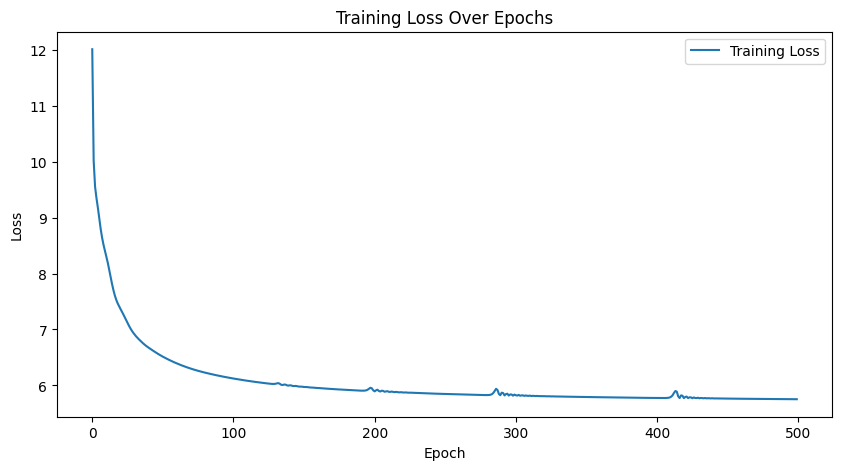

Optimization finished for SC data!


In [4]:
device = torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
model = scTACL(adata,
              n_top_genes=3000,
              epochs = 500,
              dim_output=96,
              n_neighbor=5,
              device=device,
              alpha = 5,
              beta = 0.6,
              gama = 0.6)
adata = model.train()

Model training is completed and clustering begins

In [5]:
from utils import clustering
clustering(adata, n_clusters = n_cluster)

cell_name = np.array(adata.obs["cell_type1"])
cell_type, cell_label = np.unique(cell_name, return_inverse=True)
ARI = metrics.adjusted_rand_score(adata.obs['scTACL'], cell_label)
NMI = metrics.normalized_mutual_info_score(adata.obs['scTACL'], cell_label)
print(f"{ARI:.4f}, {NMI:.4f}")

0.9953, 0.9906


In [6]:
adata

AnnData object with n_obs × n_vars = 3909 × 23337
    obs: 'cell_ontology_class', 'cell_ontology_id', 'cell_type1', 'cluster', 'dataset_name', 'donor', 'free_annotation', 'gender', 'organ', 'organism', 'plate', 'platform', 'region', 'kmeans', 'scTACL'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca'
    obsm: 'feat', 'X_pca', 'adj', 'emb', 'emb_pca'
    varm: 'PCs'